TensorFlow版本: 1.14.0
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /Users/lumin/Documents/dataset/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /Users/lumin/Documents/dataset/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /Users/lumin/Documents/dataset/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /Users/lumin/Documents/dataset/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
训练集 train.num_examples      数量: 55000 
验证集 validation.num_examples 数量: 5000 
测试集 test.num_examples       数量: 10000
Instructions for updating:
Use standard f

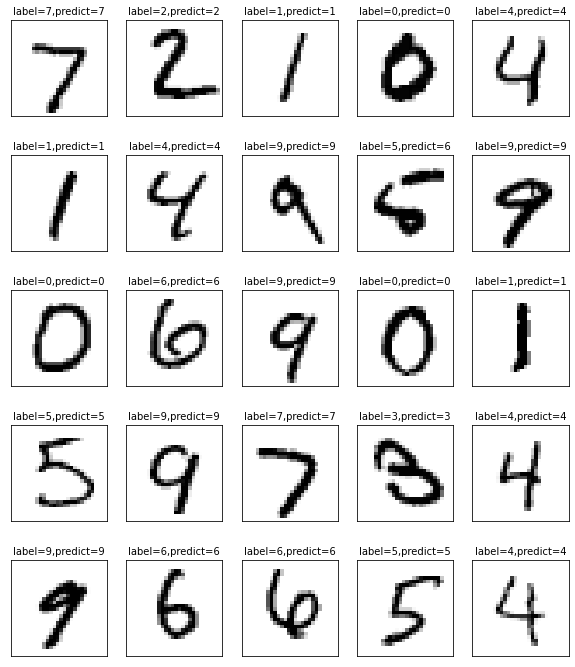

In [1]:
#coding:utf-8
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
print("TensorFlow版本:", tf.__version__)

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/Users/lumin/Documents/dataset/MNIST_data", one_hot=True)
print("训练集 train.num_examples      数量:", mnist.train.num_examples,
    "\n验证集 validation.num_examples 数量:", mnist.validation.num_examples,
    "\n测试集 test.num_examples       数量:", mnist.test.num_examples)
    
#定义全连接层函数
def fcn_layer(inputs,           #输入数据
              input_dim,        #输入神经元数量
              output_dim,       #输出神经元数量
              activation=None): #激活函数
    W = tf.Variable(tf.random.truncated_normal([input_dim, output_dim], stddev=0.1)) #以截断正态分布的随机数初始化W
    b = tf.Variable(tf.zeros([output_dim])) #以0初始化b
    XWb = tf.matmul(inputs, W) + b #建立表达式: inputs * W + b
    if activation is None: #默认有使用激活函数
        outputs = XWb
    else: # 若传入激活函数，则用其对输出结果进行变换
        outputs = activation(XWb)
    return outputs
    
# mnist 中每张图片共28*28=784个像素点
x = tf.compat.v1.placeholder(tf.float32, [None, 784], name="X")
# 0-9 一共10个数字=>10个类别
y = tf.compat.v1.placeholder(tf.float32, [None, 10], name="Y")

# 创建变量
# 在本案例中，以正态分布的随机数初始化权重W，以常数0初始化偏置b
# 定义变量
# 隐藏层神经元数量
H1_NN = 256 # 第1隐藏层神经元为256
H2_NN = 64  # 第2隐藏层神经元为64
H3_NN = 32  # 第3隐藏层神经元为32
# 构建第1隐藏层
h1 = fcn_layer(inputs=x,
               input_dim=784,
               output_dim=H1_NN,
               activation=tf.nn.relu)
# 构建第2隐藏层
h2 = fcn_layer(inputs=h1,
               input_dim=H1_NN,
               output_dim=H2_NN,
               activation=tf.nn.relu)
# 构建第3隐藏层
h3 = fcn_layer(inputs=h2,
               input_dim=H2_NN,
               output_dim=H3_NN,
               activation=tf.nn.relu)

# 构建输出层
forward = fcn_layer(inputs=h3,
               input_dim=H3_NN,
               output_dim=10,
               activation=None)
pred = tf.nn.softmax(forward)

# 定义准确率
# 检查预测类别tf.argmax(pred,1)与实际类别tf.argmax(y,1)的匹配情况
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(pred,1))
# 准确率，将布尔值转化为浮点数，并计算平均值
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# 运行时间开始
from time import time
startTime = time()

sess = tf.compat.v1.Session() # 声明会话
init = tf.compat.v1.global_variables_initializer() # 变量初始化
sess.run(init)

# 指定为模型文件的存放目录
ckpt_dir = "/Users/lumin/Documents/dataset/MNIST_data/ckpt_dir/"

# 读取模型
saver = tf.compat.v1.train.Saver()
ckpt = tf.train.get_checkpoint_state(ckpt_dir)
if ckpt and ckpt.model_checkpoint_path:
    saver.restore(sess, ckpt.model_checkpoint_path) # 从已保存的模型中读取参数
    print("restore model from " + ckpt.model_checkpoint_path)
    
# 运行总时间
duration = time() - startTime
print("Train Finished takes:", "{:.2f}".format(duration))

# 输出模型准确率
print("Test Accuracy:", sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}) )
 
# 由于pred预测结果是one-hot编码格式，所以需要转换为0~9数字。
prediction_result = sess.run(tf.argmax(pred, 1), feed_dict={x: mnist.test.images})
# 查看预测结果中的前10项
print(prediction_result[0:25].reshape(5,5))

# 可视化函数
def plot_images_labels_prediction(images,     # 图像列表
                                  labels,     # 标签列表
                                  prediction, # 预测值列表
                                  index,      # 从第index个开始显示
                                  num=10):    # 缺省一次显示10幅
    fig = plt.gcf() # 获取当前图表,Get Current Figure
    fig.set_size_inches(10,12) # 1英寸等于2.54cm
    if num > 25:
        num = 25 # 最多显示25个子图
    for i in range(0, num):
        ax = plt.subplot(5,5, i+1) # 获取当前要处理的子图
        ax.imshow(np.reshape(images[index],(28, 28)),cmap='binary')
        
        title = "label=" + str(np.argmax(labels[index])) # 构建该图上要显示的title
        
        if len(prediction)>0:
            title += ",predict=" + str(prediction[index])
            
        ax.set_title(title,fontsize=10) # 显示图上的title信息
        ax.set_xticks([]); # 不显示坐标轴
        ax.set_yticks([])
        index += 1
    plt.show()

# 可视化预测结果
for i in range(1):
    plot_images_labels_prediction(mnist.test.images, mnist.test.labels, prediction_result,i*25, 25)
